In [44]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [68]:
df3=df[['week','center_id','meal_id','checkout_price','base_price','num_orders']]

In [126]:
np.unique(df3['center_id'])

array([ 10,  11,  13,  14,  17,  20,  23,  24,  26,  27,  29,  30,  32,
        34,  36,  39,  41,  42,  43,  50,  51,  52,  53,  55,  57,  58,
        59,  61,  64,  65,  66,  67,  68,  72,  73,  74,  75,  76,  77,
        80,  81,  83,  86,  88,  89,  91,  92,  93,  94,  97,  99, 101,
       102, 104, 106, 108, 109, 110, 113, 124, 126, 129, 132, 137, 139,
       143, 145, 146, 149, 152, 153, 157, 161, 162, 174, 177, 186],
      dtype=int64)

In [116]:
x1 = df3.loc[:,['checkout_price']]
y1 = df3.loc[:,'num_orders']

In [117]:
x1

,checkout_price
0,136.83
1,136.83
2,134.86
3,339.50
4,243.50
...,...
456543,484.09
456544,482.09
456545,237.68
456546,243.50


In [120]:
#Splitting the data into train and test partition into a 70-30 split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(x1,y1,test_size = 0.3,random_state = 1)

In [121]:
#Making model for linear regression
model = linear_model.LinearRegression()
#Fitting training data into the model
model.fit(X_train1,Y_train1)

print("Coefficients : {}".format(model.coef_))
print("Variance score : {}".format(model.score(X_test1,Y_test1)))

Coefficients : [-0.73110173]
Variance score : 0.07879954695234093


In [109]:
Y_pred1 = model.predict(X_test1)
#plt.scatter(X_test1,Y_test1 , color="b")
#plt.plot(X_test1,Y_pred1,color="g")
#plt.show()

In [122]:
Y_pred1

array([178.99551043, 263.60334622, 151.88303172, ..., 393.94815789,
       385.34026687, 382.01647774])

In [91]:
Y_test1

230730      42
394065     364
149461      94
1551        82
79572       94
          ... 
357499     121
145525      53
306297    1783
252771     337
20999      595
Name: num_orders, Length: 136965, dtype: int64

In [111]:
mean_squared_log_error(Y_test1, Y_pred1)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [26]:
df1 = df[['week','meal_id','num_orders']]

In [27]:
df1

,week,meal_id,num_orders
0,1,1885,177
1,1,1993,270
2,1,2539,189
3,1,2139,54
4,1,2631,40
...,...,...,...
456543,145,1543,68
456544,145,2304,42
456545,145,2664,501
456546,145,2569,729


In [39]:
meal1 = df1[df1["meal_id"]==1885]
meal1

,week,meal_id,num_orders
0,1,1885,177
33,1,1885,1498
77,1,1885,959
119,1,1885,1025
157,1,1885,445
...,...,...,...
456329,145,1885,501
456373,145,1885,432
456414,145,1885,337
456457,145,1885,1188


In [30]:
df2=df1[['week','num_orders']]
df2_week=df2.groupby(['week'])
df2_week.head()

,week,num_orders
0,1,177
1,1,270
2,1,189
3,1,54
4,1,40
...,...,...
453280,145,121
453281,145,54
453282,145,135
453283,145,15


In [31]:
df2_week_sum=df2_week.sum()
df2_week_sum.head()

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675


In [34]:
df2_week_sum.reset_index(inplace=True)
df2_week_sum

,index,week,num_orders
0,0,1,792261
1,1,2,787084
2,2,3,695262
3,3,4,743529
4,4,5,1198675
...,...,...,...
140,140,141,776240
141,141,142,739661
142,142,143,759926
143,143,144,801197


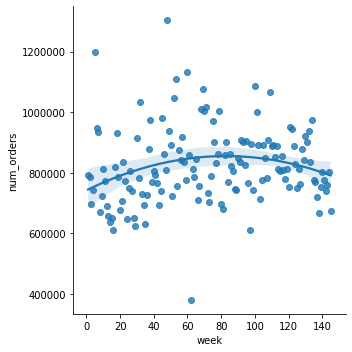

In [35]:
sns.lmplot(x = "week" , y="num_orders",data = df2_week_sum,palette="Set1",order = 2)

In [42]:

X = np.array(df2_week_sum["week"]).reshape(-1,1)
Y = np.array(df2_week_sum["num_orders"]).reshape(-1,1)

#Splitting the data into train and test partition into a 70-30 split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [47]:
#Making model for linear regression
model = linear_model.LinearRegression()
#Fitting training data into the model
model.fit(X_train,Y_train)

print("Coefficients : {}".format(model.coef_))
print("Variance score : {}".format(model.score(X_test,Y_test)))

Coefficients : [[516.40538566]]
Variance score : -0.18305847230150363


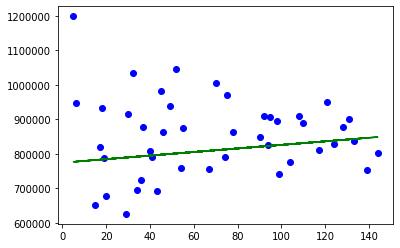

In [51]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test , color="b")
plt.plot(X_test,Y_pred,color="g")
plt.show()

In [52]:
Y_pred

array([[795168.3319522 ],
       [808594.87197947],
       [782774.60269626],
       [841644.81666197],
       [801881.60196583],
       [777094.14345395],
       [781741.79192493],
       [829767.4927917 ],
       [792586.30502388],
       [821505.00662107],
       [799299.57503751],
       [812726.11506478],
       [814275.33122177],
       [812209.70967911],
       [797233.95349485],
       [836480.76280533],
       [790520.68348122],
       [789487.87270989],
       [791553.49425255],
       [802398.0073515 ],
       [840095.60050498],
       [820472.19584974],
       [784323.81885325],
       [796201.14272353],
       [825119.84432072],
       [845776.05974729],
       [838029.97896232],
       [834415.14126267],
       [823054.22277806],
       [797750.35888052],
       [788971.46732423],
       [830800.30356302],
       [827701.87124904],
       [824603.43893505],
       [783291.00808192],
       [822537.8173924 ],
       [848358.08667561],
       [842677.6274333 ],
       [8101

In [58]:
df2_week_sum[df2_week_sum['week']==17]

,index,week,num_orders
16,16,17,820285


In [59]:
Y_test

array([[ 791493],
       [ 756281],
       [ 820285],
       [ 899953],
       [ 757268],
       [ 947288],
       [ 651719],
       [ 908764],
       [ 724865],
       [ 908145],
       [ 936980],
       [ 970760],
       [ 862030],
       [ 789591],
       [ 981199],
       [ 950500],
       [1034202],
       [ 915399],
       [ 693603],
       [ 875145],
       [ 878397],
       [ 849868],
       [ 677834],
       [ 693271],
       [ 742048],
       [ 751935],
       [ 827257],
       [ 809625],
       [ 905841],
       [ 862620],
       [ 625414],
       [ 889255],
       [ 774644],
       [ 894021],
       [ 932560],
       [ 825030],
       [ 801197],
       [ 835583],
       [1004649],
       [ 787196],
       [1198675],
       [1046811],
       [ 807159],
       [ 877853]], dtype=int64)

In [62]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(Y_test, Y_pred)

0.019498138611414927